In [1]:
from arcgis.gis import GIS
from arcgis.features import SpatialDataFrame
%matplotlib inline  

# ArcGIS API for Python: Mapping, Visualization and Analysis

<center><img src="./img/rubik.jpg" /></center>


- Andrew Chapkowski
- Atma Mani

## Agenda

- Jupyter Basics
    + Keyboard shortcuts
    + Inline methods
- What is the Python API?
- Getting Started with GIS
- Mapping
- The Spatial DataFrame
    + Working with geometry
    + Importing/exporting data
    + Visualization
- Visualizing Raster Data
- Non-Spatial Data Visualization
- Analysis Demo: Frechet Distance
- Questions

# Jupyter Basics

## What is Jupyter Notebooks?

- Environment that allows you to create, share and use live code
- Some uses include: 
    + geographic analysis
    + data cleaning and transformation
    + numerical simulation
    + statistical modeling
    + data visualization
    + machine learning


# Jupyter Basics

## Keyboard Shortcuts

The most important keyboard shortcuts are:

- **Enter**, which enters edit mode
- **Esc**, which enters command mode.


# Jupyter Basics

## Keyboard Shortcuts when in command mode

1. Basic navigation: enter, shift-enter, up/k, down/j
2. Saving the notebook: s
3. Change Cell types: y, m, 1-6, t
4. Cell creation: a, b
5. Cell editing: x, c, v, d, z
6. Kernel operations: i, 0 (press twice)

## Two **VERY** Important Shortcuts!

- **Alt-Enter** runs the current cell and inserts a new one below.
- **Ctrl-Enter** run the current cell and enters command mode.

# Jupyter Basics

## Matplotlib Inline

- Allows for use of plotting and mapping graphs



In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

# Demo: Plotting Inline

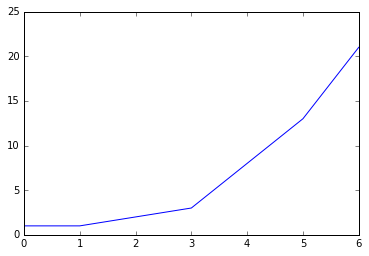

In [2]:
data = [1,1,2,3,8,13,21]
plt.figure()
plt.plot(data)

# Demo: Plotting Inline

- we can do better

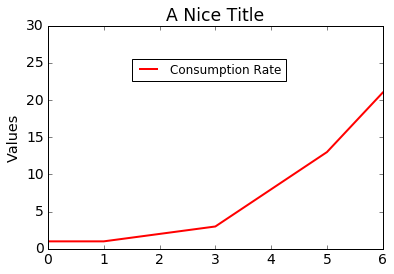

In [3]:
plt.figure()
plt.title("A Nice Title", size='xx-large')
plt.ylabel('Values',size='x-large')
plt.ylim([0,30])
plt.plot(data,'r-', markersize=10, linewidth=2, label='Consumption Rate')
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(loc=(0.25,0.75), scatterpoints=1)

# What is the Python API?

<center><img src='./img/WhatIsAPI.png'/> </center>

# Getting Started with the GIS Object

- The GIS object gets you into the Enterprise system
    + ArcGIS Online
    + Local ArcGIS Enterprise


In [4]:
import getpass

In [5]:
from arcgis.gis import GIS
gis = GIS(username=getpass.getpass(), 
          password=getpass.getpass())

········
········


## Common GIS Tasks

#### Searching

<Item title:"Colored Pencil Map" type:Web Map owner:esri>
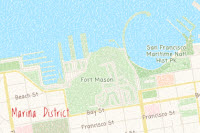

In [6]:
items = gis.content.search("owner: esri",outside_org=True)
items[0]

#### Using Content

In [7]:
items = gis.content.search("Boundary and owner: esri",outside_org=True, item_type="Feature Layer")
fl = items[0].layers[0]
fl.query(where="AGE_10_14 >700", return_all_records=False).df.head()

,AGE_10_14,AGE_15_19,AGE_20_24,AGE_25_34,AGE_35_44,AGE_45_54,AGE_55_64,AGE_5_9,AGE_65_74,AGE_75_84,...,POP2010,POP2012,RENTER_OCC,SQMI,STATE_FIPS,STCOFIPS,TRACT,VACANT,WHITE,SHAPE
0,706,613,354,1456,1589,1504,1140,724,461,167,...,9585,11370,183,24.08,48,48157,673400,190,6879,"{'spatialReference': {'latestWkid': 4326, 'wki..."
1,1402,786,339,1728,3042,1627,1021,1722,436,133,...,13832,15055,292,24.66,48,48157,674502,219,8148,"{'spatialReference': {'latestWkid': 4326, 'wki..."
2,2165,1843,1417,5619,5346,3414,2024,2517,766,251,...,28537,32496,1291,18.71,48,48157,672900,403,11427,"{'spatialReference': {'latestWkid': 4326, 'wki..."
3,827,702,481,977,1384,1139,668,816,217,97,...,8011,8150,202,1.74,48,48157,672701,65,1336,"{'spatialReference': {'latestWkid': 4326, 'wki..."
4,716,371,130,818,1498,796,383,878,156,52,...,6533,6889,403,2.77,48,48339,690602,177,5465,"{'spatialReference': {'latestWkid': 4326, 'wki..."


#### Adding Content

In [41]:
shp_item = gis.content.add(
    item_properties={
        'title' : 'United States',
        'type' : 'Shapefile',
        'tags' : ['boundary','US', 'North America']
        },
    data="./data/states.shp.zip"
)
shp_item

<Item title:"United States" type:Shapefile owner:AndrewSolutions>

#### Publishing Content

In [42]:
pub_item = shp_item.publish(publish_parameters={"maxRecordCount": 2000, 
                                         "hasStaticData": True, 
                                         "name": "UnitedStates", 
                                         "layerInfo": {"capabilities": "Query"}})
pub_item

<Item title:"United States" type:Feature Layer Collection owner:AndrewSolutions>

# The Spatial DataFrame

<center><img src="./img/spatialdata.jpg" width=400/></center>

- An extended Pandas dataframe
- Spatial capabilities
    + import/export data
    + visualize data
    + manipulate data

# The Spatial DataFrame

## Geometry Engine Caveat

- ArcPy (deffault if present)
- Shapely (used if no arcpy)
- None (no geometry operations allowed)

# The Spatial DataFrame

## Working with Geometry

- Supports simple: Points, Lines, Polygons, and MultiPoints


# The Spatial DataFrame

## Demo: Converting X/Y into ArcGIS Geometries

In [8]:
import pandas as pd
df = pd.read_csv(r"./data/all_week.csv")
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2018-02-22T12:11:03.886Z,59.607900,-143.288500,11.90,2.10,ml,NaN,NaN,NaN,0.98,...,2018-02-22T12:17:57.376Z,"70km SW of Cape Yakataga, Alaska",earthquake,NaN,1.30,NaN,NaN,automatic,ak,ak
1,2018-02-22T12:01:47.650Z,19.385334,-155.239838,0.47,2.20,ml,33.0,56.0,0.01083,0.24,...,2018-02-22T12:07:25.160Z,"5km S of Volcano, Hawaii",earthquake,0.30,0.21,0.200,11.0,automatic,hv,hv
2,2018-02-22T11:57:11.153Z,60.991000,-146.947300,20.10,1.50,ml,NaN,NaN,NaN,0.72,...,2018-02-22T12:02:45.411Z,"35km WSW of Valdez, Alaska",earthquake,NaN,0.20,NaN,NaN,automatic,ak,ak
3,2018-02-22T11:46:05.860Z,38.796501,-122.764336,0.59,0.80,md,9.0,112.0,0.02105,0.03,...,2018-02-22T12:01:03.815Z,"2km NNW of The Geysers, CA",earthquake,0.40,1.32,0.140,3.0,automatic,nc,nc
4,2018-02-22T11:41:11.530Z,33.850833,-117.727167,10.81,0.88,ml,24.0,56.0,0.05635,0.17,...,2018-02-22T11:44:55.863Z,"9km ENE of Villa Park, CA",earthquake,0.31,0.68,0.199,19.0,automatic,ci,ci


In [44]:
from arcgis.geometry import Point
geoms = []
for row in df.to_records():
    geoms.append(
        Point({
            'spatialReference' : {'wkid' : 4326},
            'x' : row[3],
            'y' : row[2]
        })
    )

In [45]:
sdf_eq = SpatialDataFrame(data=df, geometry=geoms)
sdf_eq.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,SHAPE
0,2018-02-22T12:11:03.886Z,59.607900,-143.288500,11.90,2.10,ml,NaN,NaN,NaN,0.98,...,"70km SW of Cape Yakataga, Alaska",earthquake,NaN,1.30,NaN,NaN,automatic,ak,ak,"{'y': 59.6079, 'spatialReference': {'wkid': 43..."
1,2018-02-22T12:01:47.650Z,19.385334,-155.239838,0.47,2.20,ml,33.0,56.0,0.01083,0.24,...,"5km S of Volcano, Hawaii",earthquake,0.30,0.21,0.200,11.0,automatic,hv,hv,"{'y': 19.385334, 'spatialReference': {'wkid': ..."
2,2018-02-22T11:57:11.153Z,60.991000,-146.947300,20.10,1.50,ml,NaN,NaN,NaN,0.72,...,"35km WSW of Valdez, Alaska",earthquake,NaN,0.20,NaN,NaN,automatic,ak,ak,"{'y': 60.991, 'spatialReference': {'wkid': 432..."
3,2018-02-22T11:46:05.860Z,38.796501,-122.764336,0.59,0.80,md,9.0,112.0,0.02105,0.03,...,"2km NNW of The Geysers, CA",earthquake,0.40,1.32,0.140,3.0,automatic,nc,nc,"{'y': 38.7965012, 'spatialReference': {'wkid':..."
4,2018-02-22T11:41:11.530Z,33.850833,-117.727167,10.81,0.88,ml,24.0,56.0,0.05635,0.17,...,"9km ENE of Villa Park, CA",earthquake,0.31,0.68,0.199,19.0,automatic,ci,ci,"{'y': 33.8508333, 'spatialReference': {'wkid':..."


# The Spatial DataFrame

## Simple Geometry Operations

In [46]:
pt = sdf_eq.geometry[0]
pt.distance_to(sdf_eq.geometry[1])

41.960568228439534

# The Spatial DataFrame

## Importing Data

- From Feature Layers

In [47]:
query = pub_item.layers[0].query()
sdf = query.df
sdf.head()

,AGE_10_14,AGE_15_19,AGE_20_24,AGE_25_34,AGE_35_44,AGE_45_54,AGE_55_64,AGE_5_9,AGE_65_74,AGE_75_84,...,STATE_FIPS,STATE_NAME,SUB_REGION,Shape_Area,Shape_Leng,Shape__Area,Shape__Length,VACANT,WHITE,SHAPE
0,81539,85994,95829,185333,176373,193765,175562,83361,100523,64377,...,15,Hawaii,Pacific,1.429289,11.952787,1.888067e+10,1.370185e+06,64170,336599,"{'spatialReference': {'wkid': 102100, 'latestW..."
1,438233,462128,461512,933781,908305,988205,835165,429877,457220,253186,...,53,Washington,Pacific,20.750758,34.956857,3.798855e+11,4.578373e+06,265601,5196362,"{'spatialReference': {'wkid': 102100, 'latestW..."
2,116955,115359,108209,208965,191609,208537,180313,121195,109534,59892,...,16,Idaho,Mountain,24.391595,28.529673,4.235214e+11,3.858889e+06,88388,1396487,"{'spatialReference': {'wkid': 102100, 'latestW..."
3,242553,254860,253048,524144,499525,539075,509566,237214,290041,165620,...,41,Oregon,Pacific,28.187789,24.787249,4.853035e+11,3.152829e+06,156624,3204614,"{'spatialReference': {'wkid': 102100, 'latestW..."
4,183173,182600,177509,387286,383043,376527,315499,183077,197781,96391,...,32,Nevada,Mountain,29.969925,23.608734,4.807101e+11,3.025639e+06,167564,1786688,"{'spatialReference': {'wkid': 102100, 'latestW..."


# The Spatial DataFrame

## Importing Data

- From Feature Classes

In [48]:
sdf_grid = SpatialDataFrame.from_featureclass(r"./data/survey.gdb/grid")
sdf_grid.head()

,OID,PageName,PageNumber,SHAPE
0,149,A149,1,"{'rings': [[[-156.79724118327778, 71.314822194..."
1,150,A150,2,"{'rings': [[[-156.65250903992157, 71.314822194..."
2,151,A151,3,"{'rings': [[[-156.50777689656536, 71.314822194..."
3,916,B147,4,"{'rings': [[[-157.08670546999022, 71.170090051..."
4,917,B148,5,"{'rings': [[[-156.941973326634, 71.17009005159..."


# The Spatial DataFrame

## Exporting Data

- To Feature Class

In [49]:
fc = sdf_grid.to_featureclass(out_location=r"c:\temp\scratch.gdb",
                              out_name="sg2", 
                              overwrite=True)
print(fc)
                        

C:\Program Files\ArcGIS\Pro\Resources\ArcPy\arcpy\geoprocessing\_base.py:504: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  val = getattr(self._gp, attr)


c:\temp\scratch.gdb\sg2


# The Spatial DataFrame

## Exporting Data

- To Feature Layer

In [50]:
usgrid_item = gis.content.import_data(df=sdf, 
                               title="usgrids", 
                               tags=['survery', 'usa'])
usgrid_item

<Item title:"usgrids" type:Feature Layer Collection owner:AndrewSolutions>

In [51]:
## Clean up code do not show!
item2del = usgrid_item.related_items('Service2Data', 'forward')[0]
usgrid_item.delete()
pub_item.delete()
item2del.delete()

True

# The Spatial DataFrame

## Visualization

- matplotlib like syntax

In [52]:
city_item = gis.content.get("85d0ca4ea1ca4b9abf0c51b9bd34de2e")
m = gis.map('California')
m

In [53]:
sdf = city_item.layers[0].query().df

In [54]:
sdf.plot(kind='map', map_widget=m)   

True

# The Spatial DataFrame

## Visualizing Color Maps

In [55]:
from arcgis.mapping import display_colormaps
from arcgis.mapping import generate_renderer
from arcgis.mapping import create_symbol
from arcgis.mapping import show_styles

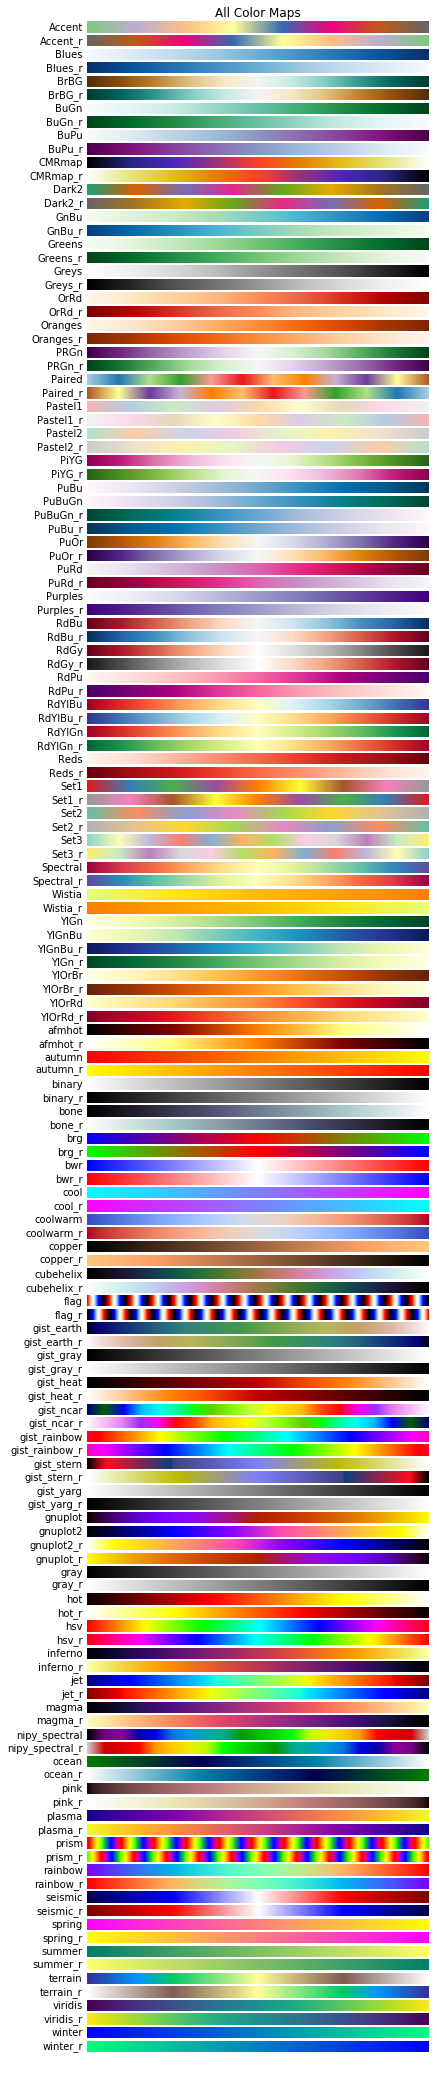

In [56]:
display_colormaps()

## Query Color Map Searching

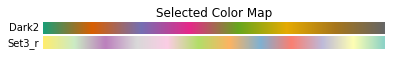

In [57]:
display_colormaps(['Dark2', 'Set3_r'])

### Supported Renderers

+ Class Breaks - renders on numeric data
+ Heatmap - renders point data into raster visualization
+ Simple - renders using a symbol only
+ Temporal - provide time-based rendering of features in a feature layer
+ Unique - renders on one or more string attributes
+ Vector - renderer that uses symbolizes a U-V or Magnitude-Direction data
+ Predominance - special type of unique value renderer based off of arcade expressions

### Using Renderers

Renders are generated when a plot method is called off of the SpatialDataFrame.

In [58]:
m = gis.map('California')
m

In [59]:
sdf.plot(kind='map', map_widget=m,
         renderer_type='s', symbol_style='d',
         marker_size=10,alpha=.5,
         colors='Spectral_r')

True

In [60]:
sdf.plot(kind='map', map_widget=m, renderer_type='h', 
     blue_radius=5, field='FHH_CHILD', alpha=.75)

True

# Application of Spatial Dataframe

## How do we compare two data street networks of the same city from different sources?

- Visually examine data
    + Scale dependant, no metric
- Geoprocessing and look for fragments
- Quantitative way of analysis

# Application of Spatial Dataframe

## Challenges:

- OID do not match

- Projection issues

- Non-uniform tabular data

# Application of Spatial Dataframe

## Geometric Solution: Frechet Distance 

- find the largest distance between the man and its dog as they walk along their respective path; finally, keep the smallest distance found among these maximum distances.

<center><img src='./img/Frechet_1.png' width=50%/></center>

<center> <img src='./img/frechet_time_complexity.png'/></center>

# Implementation of Frechet Distance
<center><img src='./img/distance.jpg' /></center>

In [9]:
import math
import numpy as np

def distance(p1, p2):
    x1,y1 = p1
    x2,y2 = p2
    return math.sqrt(math.pow(x2-x1, 2) + math.pow(y2-y1, 2))

In [10]:
def _c(ca,i,j,P,Q):
    """
    Algorithm Implementation
    Adapted from: http://www.kr.tuwien.ac.at/staff/eiter/et-archive/cdtr9464.pdf
    """
    if ca[i,j] > -1:
        return ca[i,j]
    elif i == 0 and j == 0:
        ca[i,j] = distance(P[0],Q[0])
    elif i > 0 and j == 0:
        ca[i,j] = max(_c(ca,i-1,0,P,Q),distance(P[i],Q[0]))
    elif i == 0 and j > 0:
        ca[i,j] = max(_c(ca,0,j-1,P,Q),distance(P[0],Q[j]))
    elif i > 0 and j > 0:
        ca[i,j] = max(min(_c(ca,i-1,j,P,Q),_c(ca,i-1,j-1,P,Q),_c(ca,i,j-1,P,Q)),distance(P[i],Q[j]))
    else:
        ca[i,j] = float("inf")
    return ca[i,j]

In [11]:
def frechet(P,Q):
    """
    Computes the discrete frechet distance between two polylines or polygons (closed)
    :P: array of X/Y coordinates
    :Q: array of X/Y coordinates
    
    returns: float
    """
    ca = np.ones((len(P),len(Q)))
    ca = np.multiply(ca,-1)
    return _c(ca,len(P)-1,len(Q)-1,P,Q)


In [ ]:
fc_new = r".\data\comparable_dataset.gdb\small_after_wm"
fc_old = r".\data\comparable_dataset.gdb\small_before_wm" 
sdf_new = SpatialDataFrame.from_featureclass(fc_new)
sdf_old = SpatialDataFrame.from_featureclass(fc_old)
s_old = sdf_old.sindex

In [23]:
m = gis.map('VIENTIANE')
m

In [26]:
sdf_new.plot(kind='map', map_widget=m, pallette="Reds_r")
sdf_old.plot(kind='map', map_widget=m, pallette='Greens_r')

True

In [13]:
sdf_new.sr
import pandas as pd

In [14]:

results = []

for pidx, g in enumerate(sdf_new.geometry):
    
    indexes = s_old.intersect([g.extent.XMin, g.extent.YMin, g.extent.XMax, g.extent.YMax])
    for idx in indexes:
        g_compare = sdf_old.iloc[idx]['SHAPE']['paths'][0]
        f = frechet(g['paths'][0], 
                    g_compare)
        results.append([pidx, idx, f])

In [19]:
df = pd.DataFrame(data=results, columns=['SourceID', 'ComparedID', 'Distance'])
gb = df.groupby('SourceID').min()
df = gb.reset_index(drop=False)
q = df['Distance']>0
df = df[q].copy()
df.head(10)

,SourceID,ComparedID,Distance
1,1,13,8.043706
3,3,16,62.477290
5,5,12,71.249192
6,6,13,44.039078
7,7,12,85.265060
9,9,12,217.239597
13,13,19,2.727003
18,18,7,29.389553
21,21,23,7.262502
22,22,23,370.908832


In [16]:
old_w_dist = sdf_old.join(df.set_index('ComparedID'))
old_w_dist.reset_index(inplace=True, drop=True)
del old_w_dist['OBJECTID']

In [17]:
m = gis.map('VIENTIANE')
m

In [18]:
m.basemap = 'dark-gray-vector'
sdf_new.plot(kind='map', map_widget=m, line_width=1.25, pallette='Blues_r')
old_w_dist[old_w_dist['Distance'].notnull()].copy().plot(
    kind='map', map_widget=m, pallette='Reds_r', cstep=150)

True

# GeoAnalytics

# Raster Analysis

# Questions?

<center><img src='./img/survey.JPG'/></center>

<center><img src='./img/lastslide.JPG'></center>